In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")



In [2]:
df = pd.read_csv("mushroom.csv")


df = df.drop(columns=["Unnamed: 0"])

In [3]:
print("Shape:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())
df.head()


Shape: (2000, 25)

Data types:
 cap_shape                    object
cap_surface                  object
cap_color                    object
bruises                      object
odor                         object
gill_attachment              object
gill_spacing                 object
gill_size                    object
gill_color                   object
stalk_shape                  object
stalk_root                   object
stalk_surface_above_ring     object
stalk_surface_below_ring     object
stalk_color_above_ring       object
stalk_color_below_ring       object
veil_type                    object
veil_color                   object
ring_number                  object
ring_type                    object
spore_print_color            object
population                   object
habitat                      object
class                        object
stalk_height                float64
cap_diameter                float64
dtype: object

Missing values:
 cap_shape                   0
cap_su

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


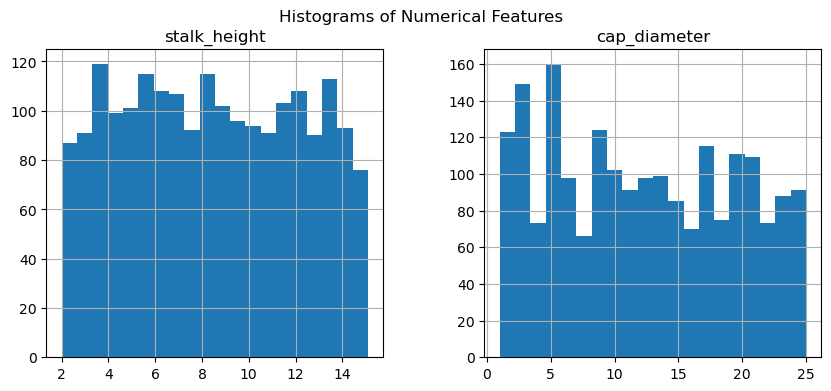

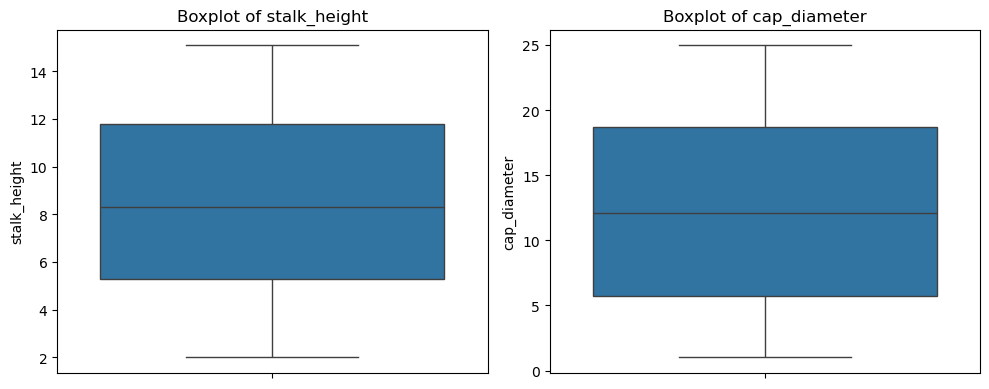

In [4]:
num_cols = ["stalk_height", "cap_diameter"]


df[num_cols].hist(bins=20, figsize=(10,4))
plt.suptitle("Histograms of Numerical Features")
plt.show()


plt.figure(figsize=(10,4))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

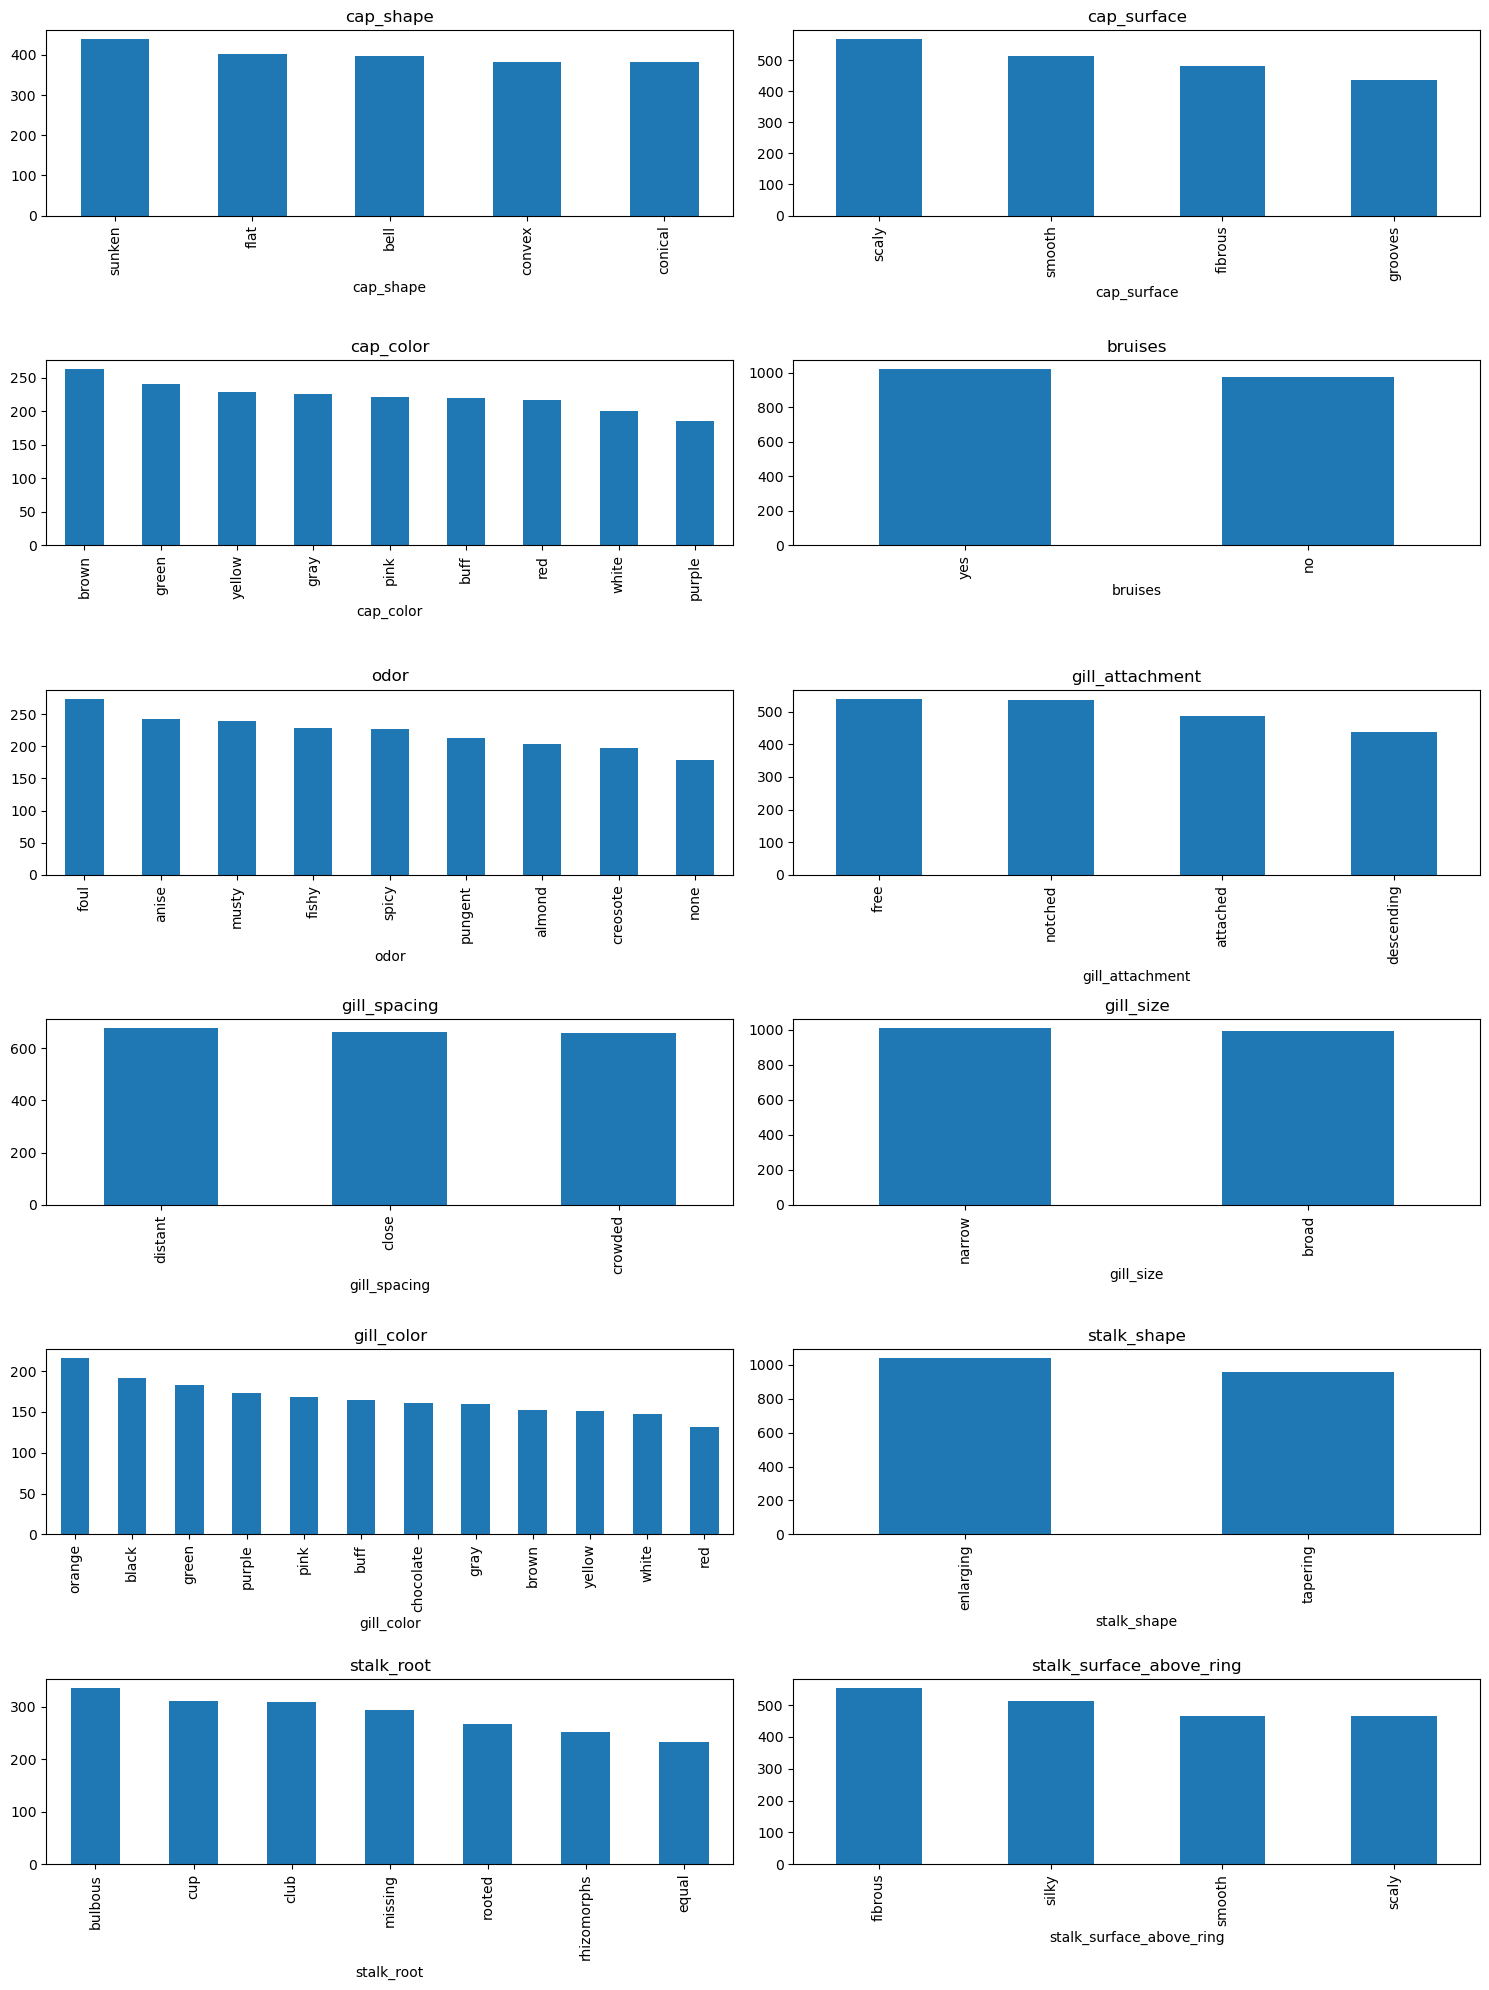

In [5]:
cat_cols = [col for col in df.columns if col not in num_cols + ["class"]]

plt.figure(figsize=(15, 20))
for i, col in enumerate(cat_cols[:12], 1):  # first 12 to avoid overcrowding
    plt.subplot(6, 2, i)
    df[col].value_counts().plot(kind="bar")
    plt.title(col)
plt.tight_layout()
plt.show()

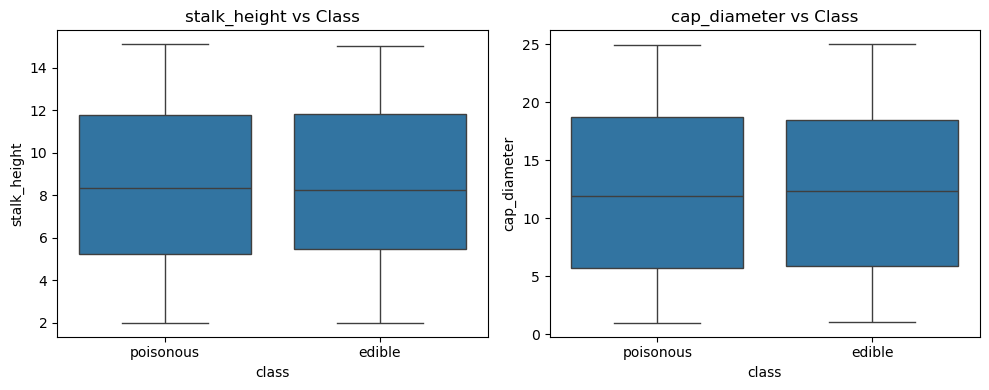

In [7]:
plt.figure(figsize=(10,4))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(x="class", y=col, data=df)
    plt.title(f"{col} vs Class")
plt.tight_layout()
plt.show()


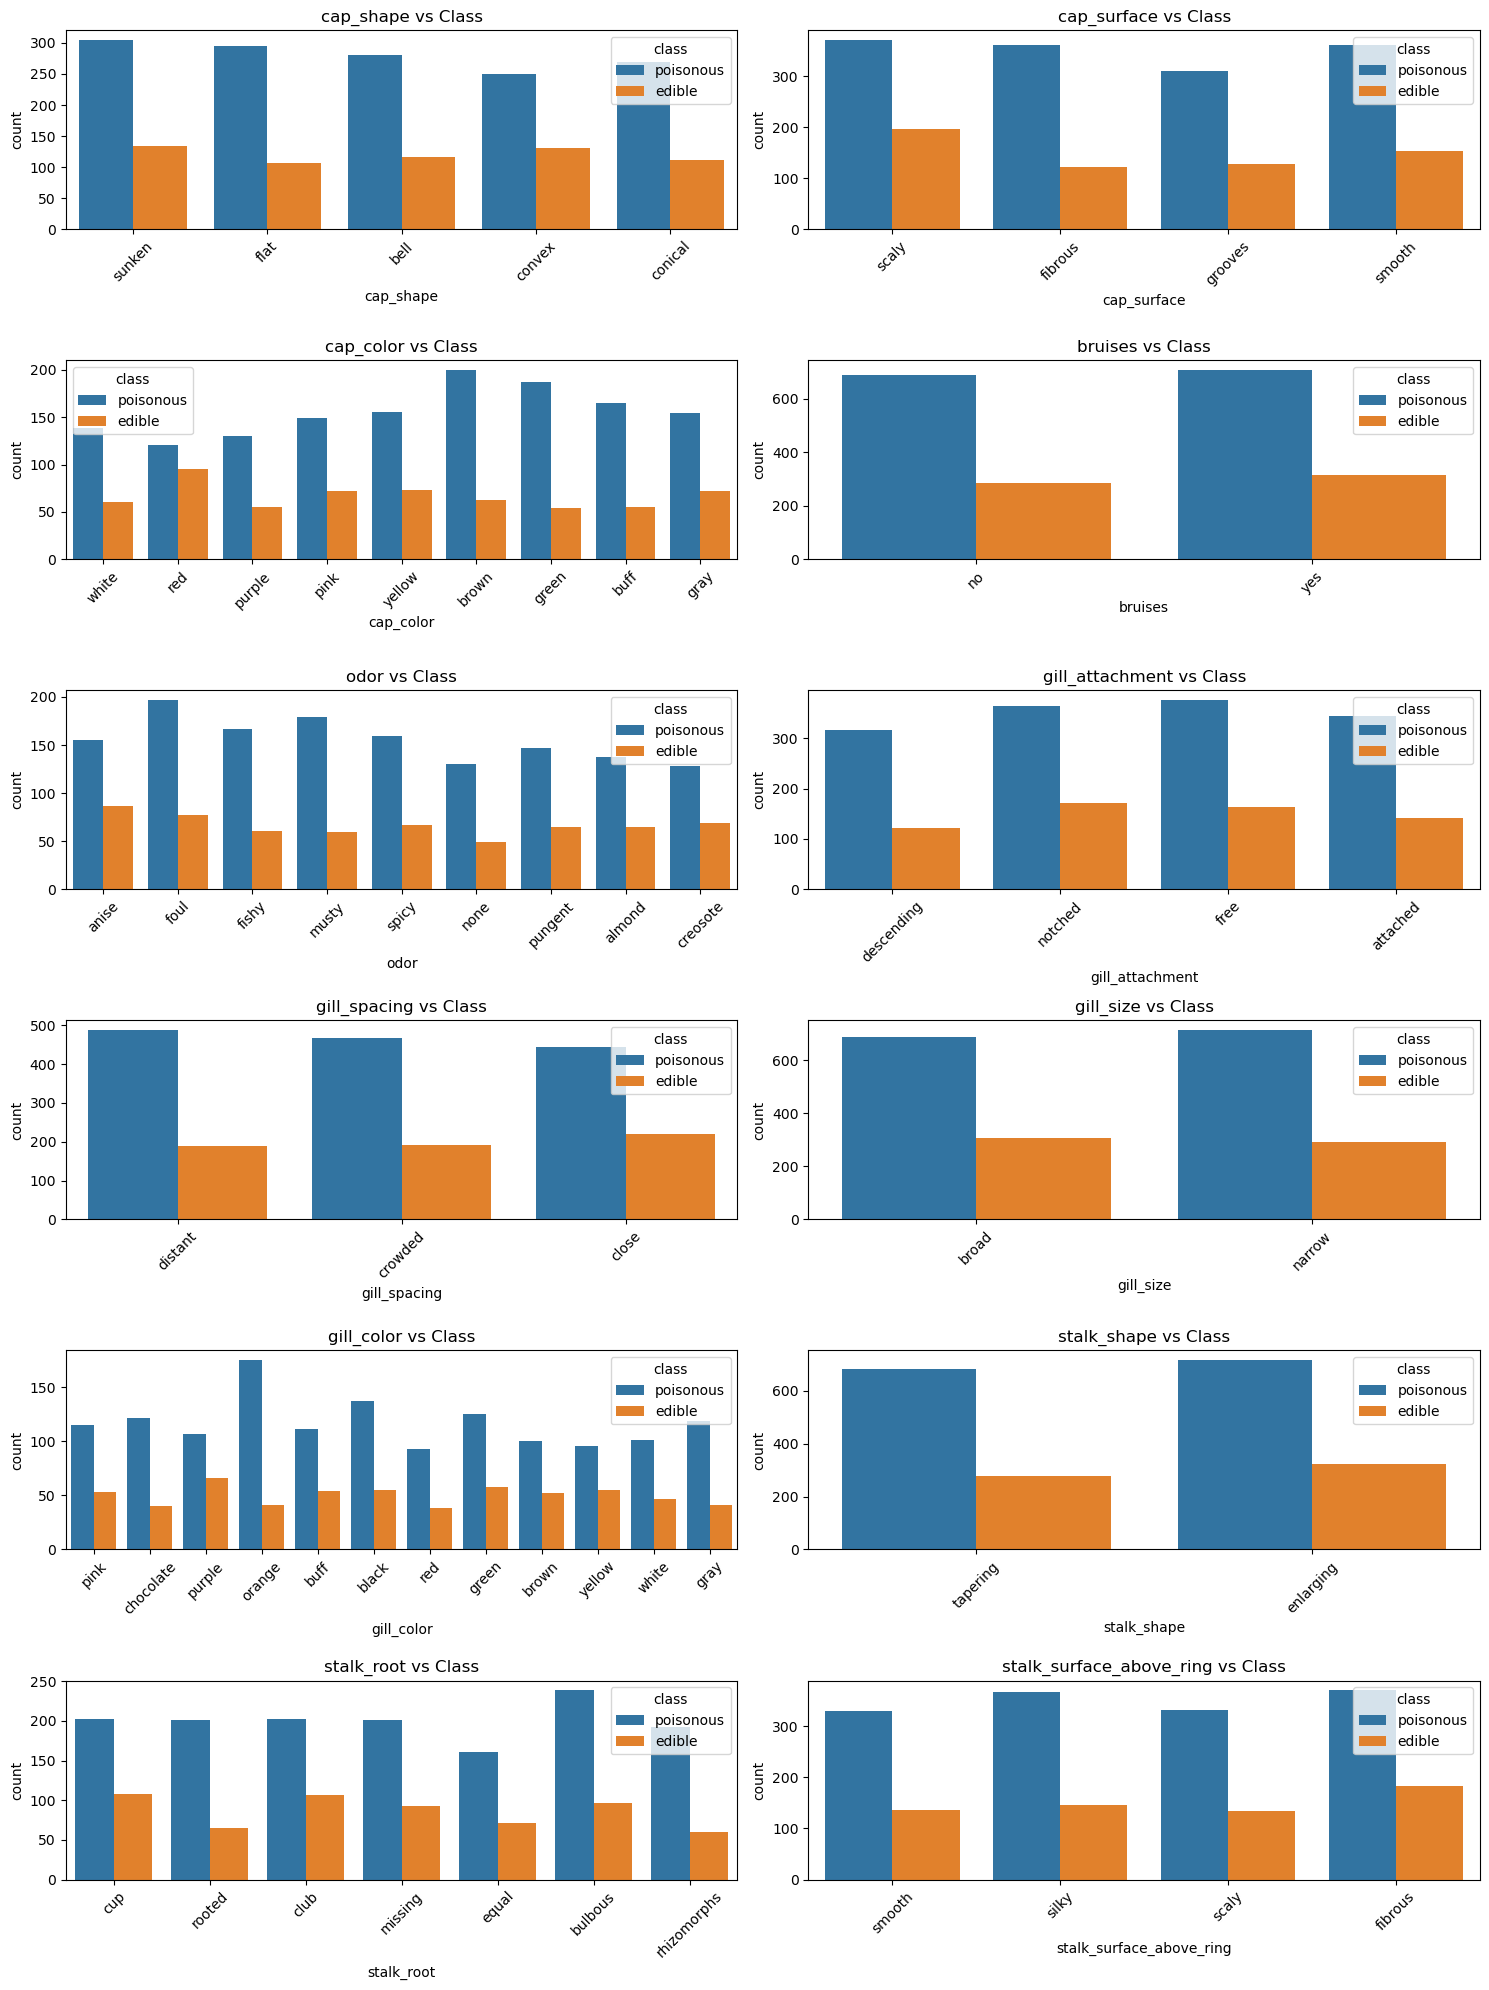

In [8]:
plt.figure(figsize=(15, 20))
for i, col in enumerate(cat_cols[:12], 1):
    plt.subplot(6, 2, i)
    sns.countplot(x=col, hue="class", data=df)
    plt.title(f"{col} vs Class")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

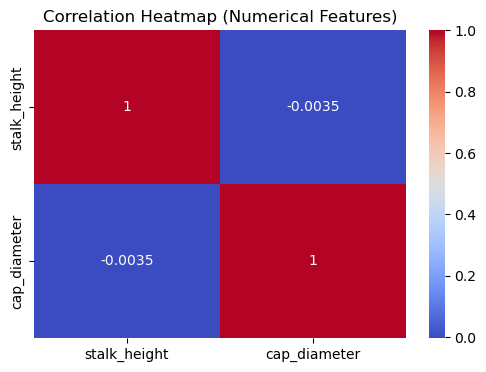

In [9]:
plt.figure(figsize=(6,4))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()


In [10]:
import numpy as np
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


cat_corr = {col: cramers_v(df[col], df["class"]) for col in cat_cols}
pd.Series(cat_corr).sort_values(ascending=False)


cap_color                   0.117205
gill_color                  0.089949
habitat                     0.087658
population                  0.082153
stalk_root                  0.067728
ring_type                   0.065263
cap_surface                 0.063611
veil_color                  0.063467
stalk_color_above_ring      0.061350
spore_print_color           0.052505
stalk_color_below_ring      0.052462
odor                        0.043748
gill_spacing                0.037589
ring_number                 0.036674
cap_shape                   0.031000
stalk_surface_above_ring    0.019820
stalk_shape                 0.005060
bruises                     0.000000
gill_attachment             0.000000
gill_size                   0.000000
stalk_surface_below_ring    0.000000
veil_type                   0.000000
dtype: float64

In [11]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()


le = LabelEncoder()
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        df_encoded[col] = le.fit_transform(df_encoded[col])

df_encoded.head()


,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,4,2,7,0,1,1,2,0,7,1,...,0,0,2,6,3,1,5,1,14.276173,5.054983
1,4,0,6,0,1,3,1,1,3,0,...,1,0,2,6,1,2,5,0,3.952715,19.068319
2,3,1,5,1,4,1,1,0,8,1,...,1,3,2,6,6,0,5,1,9.054265,7.205884
3,0,2,4,1,3,3,0,0,6,0,...,0,3,2,0,4,1,0,1,5.226499,20.932692
4,3,3,8,1,5,2,1,1,6,0,...,1,2,0,4,8,1,4,1,14.037532,12.545245


In [12]:
from sklearn.model_selection import train_test_split


X = df_encoded.drop(columns=["class"])
y = df_encoded["class"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (1600, 24)
Testing set shape: (400, 24)


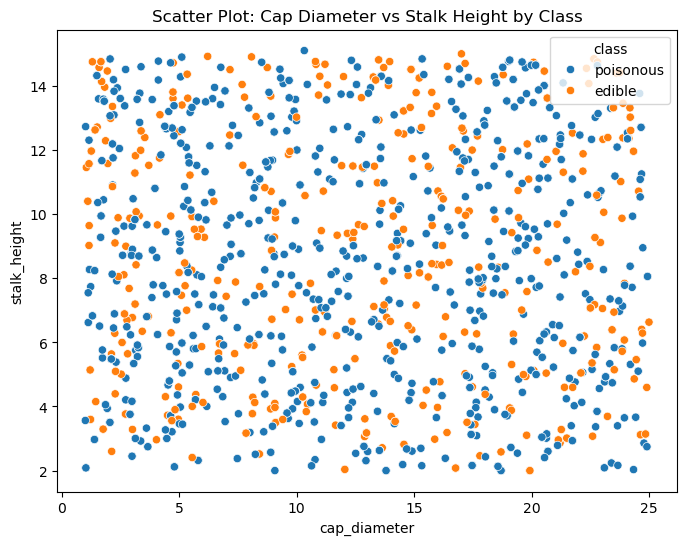

In [13]:

plt.figure(figsize=(8,6))
sns.scatterplot(x="cap_diameter", y="stalk_height", hue="class", data=df)
plt.title("Scatter Plot: Cap Diameter vs Stalk Height by Class")
plt.show()


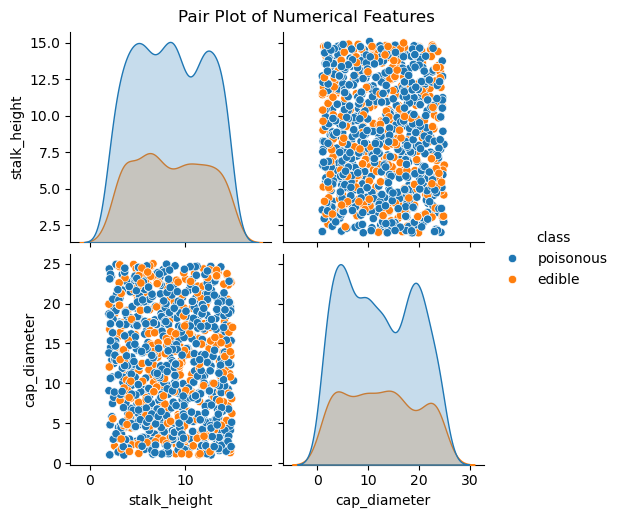

In [14]:

sns.pairplot(df, vars=["stalk_height", "cap_diameter"], hue="class", diag_kind="kde")
plt.suptitle("Pair Plot of Numerical Features", y=1.02)
plt.show()


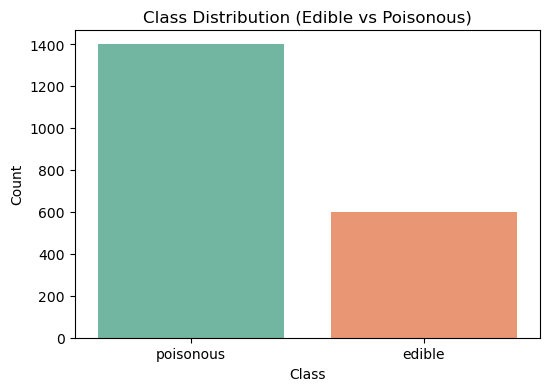

Class distribution (%):
class
poisonous    70.0
edible       30.0
Name: proportion, dtype: float64


In [17]:
plt.figure(figsize=(6,4))
sns.countplot(x="class", data=df, palette="Set2")
plt.title("Class Distribution (Edible vs Poisonous)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

class_dist = df["class"].value_counts(normalize=True) * 100
print("Class distribution (%):")
print(class_dist)


In [18]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

svm_model = SVC(kernel="rbf", random_state=42)

# Train
svm_model.fit(X_train, y_train)


SVC(random_state=42)

Accuracy: 0.7

Classification Report:

              precision    recall  f1-score   support

      Edible       0.00      0.00      0.00       120
   Poisonous       0.70      1.00      0.82       280

    accuracy                           0.70       400
   macro avg       0.35      0.50      0.41       400
weighted avg       0.49      0.70      0.58       400



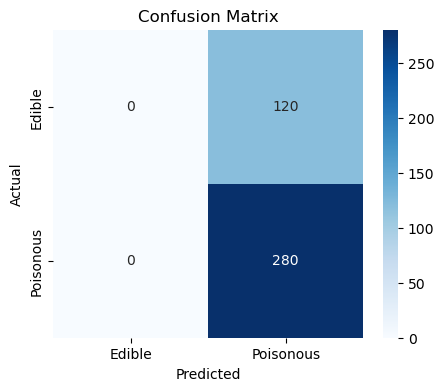

In [19]:
# Predictions
y_pred = svm_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision, Recall, F1-score
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=["Edible", "Poisonous"]))

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=["Edible", "Poisonous"], yticklabels=["Edible", "Poisonous"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [20]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)
X_train_pca = pca.transform(X_train)


svm_vis = SVC(kernel="rbf", random_state=42)
svm_vis.fit(X_train_pca, y_train)

# Predictions in PCA space
y_pred_vis = svm_vis.predict(X_test_pca)


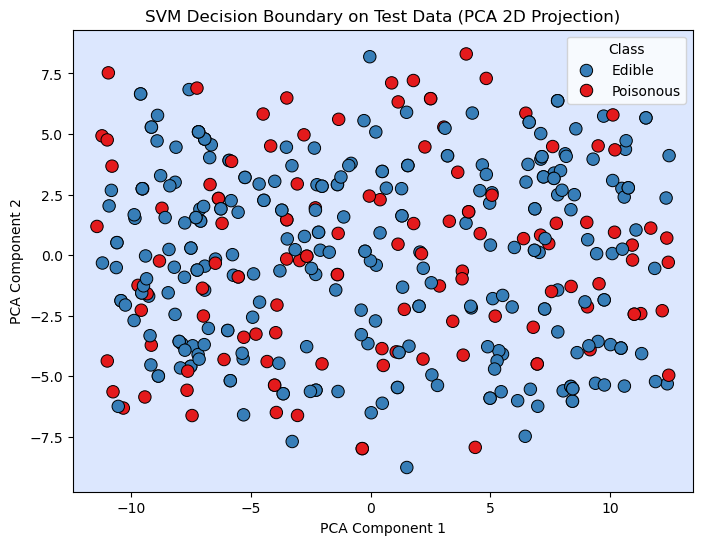

In [21]:
import numpy as np

# Create meshgrid for decision boundary
x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Predict over meshgrid
Z = svm_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary + test points
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
sns.scatterplot(x=X_test_pca[:,0], y=X_test_pca[:,1], hue=y_test,
                palette="Set1", edgecolor="k", s=80)
plt.title("SVM Decision Boundary on Test Data (PCA 2D Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Class", labels=["Edible", "Poisonous"])
plt.show()


In [22]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    "kernel": ["linear", "rbf", "poly"],
    "C": [0.1, 1, 10],
    "gamma": ["scale", "auto"]
}


svm = SVC(random_state=42)


grid_search = GridSearchCV(
    estimator=svm,
    param_grid=param_grid,
    scoring="accuracy",
    cv=5,
    verbose=1,
    n_jobs=-1
)


grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Best CV Accuracy: 0.860625


Test Accuracy: 0.86

Classification Report:

              precision    recall  f1-score   support

      Edible       1.00      0.53      0.70       120
   Poisonous       0.83      1.00      0.91       280

    accuracy                           0.86       400
   macro avg       0.92      0.77      0.80       400
weighted avg       0.88      0.86      0.85       400



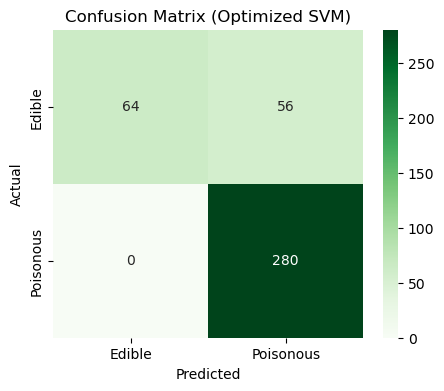

In [23]:

best_svm = grid_search.best_estimator_


y_pred_best = best_svm.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_best, target_names=["Edible", "Poisonous"]))


plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt="d", cmap="Greens",
            xticklabels=["Edible", "Poisonous"], yticklabels=["Edible", "Poisonous"])
plt.title("Confusion Matrix (Optimized SVM)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Kernel: linear
Accuracy: 0.7
              precision    recall  f1-score   support

      Edible       0.00      0.00      0.00       120
   Poisonous       0.70      1.00      0.82       280

    accuracy                           0.70       400
   macro avg       0.35      0.50      0.41       400
weighted avg       0.49      0.70      0.58       400

--------------------------------------------------
Kernel: poly
Accuracy: 0.7175
              precision    recall  f1-score   support

      Edible       0.89      0.07      0.12       120
   Poisonous       0.71      1.00      0.83       280

    accuracy                           0.72       400
   macro avg       0.80      0.53      0.48       400
weighted avg       0.77      0.72      0.62       400

--------------------------------------------------
Kernel: rbf
Accuracy: 0.7
              precision    recall  f1-score   support

      Edible       0.00      0.00      0.00       120
   Poisonous       0.70      1.00      0.82       

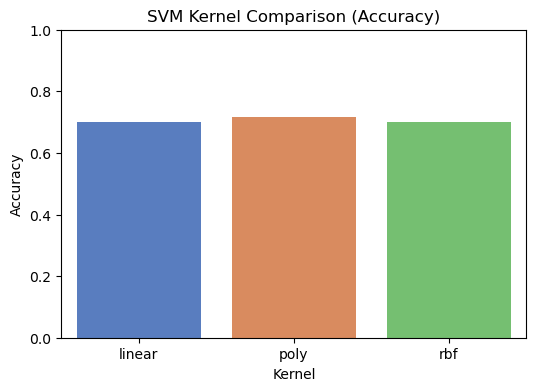

In [24]:
kernels = ["linear", "poly", "rbf"]
results = {}

for k in kernels:
    model = SVC(kernel=k, C=1, gamma="scale", random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    results[k] = acc
    print(f"Kernel: {k}")
    print("Accuracy:", acc)
    print(classification_report(y_test, y_pred, target_names=["Edible", "Poisonous"]))
    print("-"*50)

# Plot kernel comparison
plt.figure(figsize=(6,4))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="muted")
plt.title("SVM Kernel Comparison (Accuracy)")
plt.ylabel("Accuracy")
plt.xlabel("Kernel")
plt.ylim(0,1)
plt.show()
